0: 5chf
1: 2chf
2: 1chf
3: 0.5chf
4: 0.2chf
5: 0.1chf
6: 0.05chf
7: 2eur
8: 1eur
9: 0.5eur
10: 0.2eur
11: 0.1eur
12: 0.05eur
13: 0.02eur
14: 0.01eur
15: odd


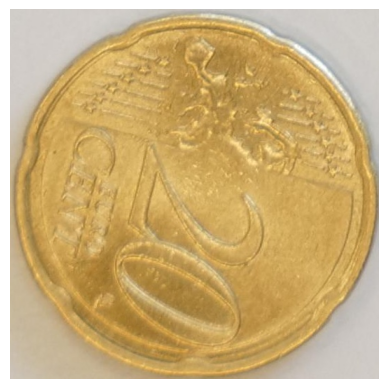

NameError: name 'changed' is not defined

In [10]:

import cv2
import os
import json
import matplotlib.pyplot as plt
from IPython.display import clear_output
path = f"output"

# Load all the image in output folder

possible_value = ["5chf", "2chf", "1chf", "0.5chf", "0.2chf", "0.1chf", "0.05chf", "2eur", "1eur", "0.5eur", "0.2eur", "0.1eur", "0.05eur", "0.02eur", "0.01eur", "odd"]
images_json = []

# Load json
if os.path.exists(f"data.json"):
    with open(f"data.json", "r") as f:
        images_json = json.load(f)


# for filename in sorted(os.listdir(path)):
for idx, x in enumerate(images_json):
    filename = x["filename"]
    value = x["value"]
    print(filename)
    print(possible_value[int(value)])
    # full_img_filename = filename.split("-")[0]+".jpg"
    # full_img = cv2.imread(f"./imgs/"+full_img_filename, cv2.IMREAD_COLOR)
    # full_img = cv2.cvtColor(full_img, cv2.COLOR_BGR2RGB)
    img = cv2.imread(f"{path}/{filename}", cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # fig, ax = plt.subplots(1,2)
    #print(full_img.shape)
    # ax[0].imshow(full_img)
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    result = input("Good value ? (y/n/q) :")
    if result == "q":
        break
    if result == "":
        break
    # if result == "y":
    #     continue
    if result == "n":
        clear_output(wait=True)
        for i in range(len(possible_value)):
            print(f"{i}: {possible_value[i]}")
        plt.imshow(img)
        plt.axis('off')
        plt.show()
        result = input("Value of coin :")
        if result == "q":
            break
        if result == "":
            break
        if int(result) < 0 or int(result) >= len(possible_value):
            print("invalid value")
            break
        else:
            images_json[idx] = {"filename": filename, "value": result, "changed" : True}
    clear_output(wait=True)

with open(f"data-fixed.json", "w") as f:
    json.dump(images_json, f, indent=4)